In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Ex 0

In [27]:
def generate_balanced_patterns(N, P):
    patterns = []
    for _ in range(P):
        pattern = np.ones(N)
        pattern[:N//2] = -1
        np.random.shuffle(pattern)
        patterns.append(pattern)
    return np.array(patterns)

(10, 100)


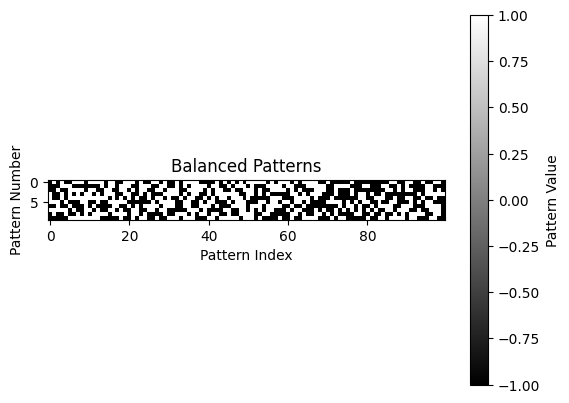

In [28]:
patterns = generate_balanced_patterns(100,10)
print(patterns.shape)
plt.imshow(patterns, cmap='gray', interpolation='nearest')
plt.title('Balanced Patterns')
plt.colorbar(label='Pattern Value')
plt.xlabel('Pattern Index')
plt.ylabel('Pattern Number')
plt.show()

In [29]:
# Step 1: Build the Hebbian weight matrix
def hebbian_weights(patterns):
    P, N = patterns.shape
    W = np.zeros((N, N))
    for mu in range(P):
        W += np.outer(patterns[mu], patterns[mu])
    W /= N
    np.fill_diagonal(W, 0)  # No self-connections
    return W

# Step 2: Update state using the weight matrix
def update_state(S, W):
    h = W @ S  # Compute input to each neuron
    return np.sign(h)  # Apply the sign function to get new state

In [30]:
def ovelap(patterns):
    P, N = patterns.shape
    overlap = np.zeros((P, P))
    for i in range(P):
        for j in range(P):
            overlap[i, j] = np.sum(patterns[i] * patterns[j]) / N
    return overlap

(10, 10)


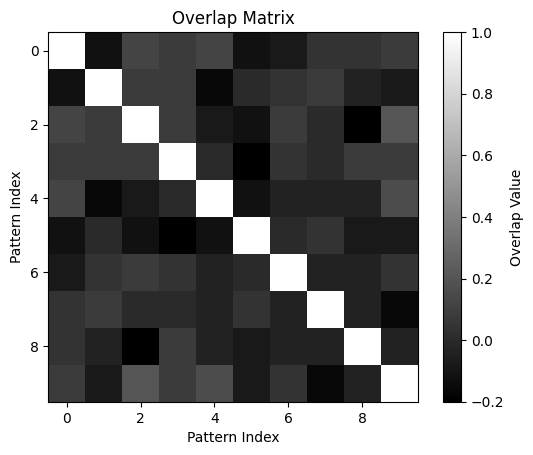

In [31]:
overlap = ovelap(patterns)
print(overlap.shape)
plt.imshow(overlap, cmap='gray', interpolation='nearest')
plt.title('Overlap Matrix')
plt.colorbar(label='Overlap Value')
plt.xlabel('Pattern Index')
plt.ylabel('Pattern Index')
plt.show()


In [32]:
def compute_overlaps(S, patterns):
    N = len(S)
    return np.array([np.dot(S, p) / N for p in patterns])

(5,)


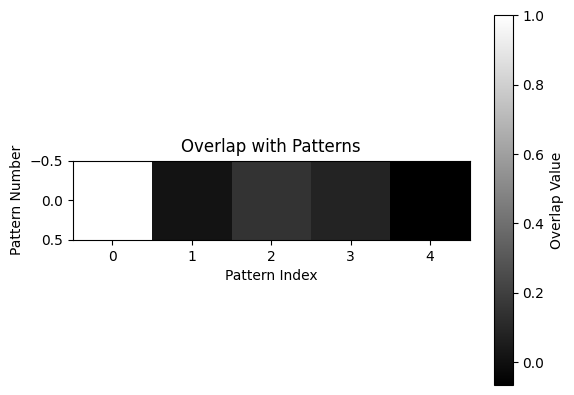

In [37]:
comp_overlaps = compute_overlaps(patterns[0], patterns)
print(comp_overlaps.shape)
plt.imshow(comp_overlaps.reshape(1, -1), cmap='gray', interpolation='nearest')
plt.title('Overlap with Patterns')
plt.colorbar(label='Overlap Value')
plt.xlabel('Pattern Index')
plt.ylabel('Pattern Number')
plt.show()


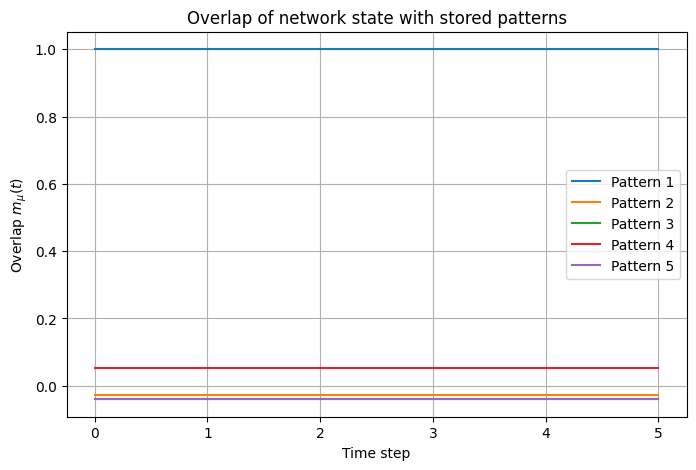

In [38]:

def compute_overlaps(S, patterns):
    N = len(S)
    return np.array([np.dot(S, p) / N for p in patterns])

# Parameters
N = 300
P = 5
T = 5

# Initialization
patterns = generate_balanced_patterns(N, P)
W = hebbian_weights(patterns)
S = patterns[0].copy()  # Initial state is first pattern

# Run network and track overlaps
overlaps = np.zeros((T+1, P))
overlaps[0] = compute_overlaps(S, patterns)

for t in range(1, T+1):
    S = update_state(S, W)
    overlaps[t] = compute_overlaps(S, patterns)

# Plotting
plt.figure(figsize=(8, 5))
for mu in range(P):
    plt.plot(range(T+1), overlaps[:, mu], label=f"Pattern {mu+1}")
plt.xlabel("Time step")
plt.ylabel("Overlap $m_\\mu(t)$")
plt.title("Overlap of network state with stored patterns")
plt.legend()
plt.grid(True)
plt.show()
